<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/main/2DCNNusingArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown --id 1Lx4s240DQDVIF2Zz7P4_DpuBKu8ELUrY

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Lx4s240DQDVIF2Zz7P4_DpuBKu8ELUrY
To: /content/TestData.zip
100% 2.24M/2.24M [00:00<00:00, 10.9MB/s]


In [ ]:
!ls /content/TestData.zip -al

-rw-r--r-- 1 root root 2235051 Jun 10 16:30 /content/TestData.zip


In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/TestData.zip" -d "/content/TestData"

Archive:  /content/TestData.zip
   creating: /content/TestData/TestData/
  inflating: /content/TestData/__MACOSX/._TestData  
  inflating: /content/TestData/TestData/.DS_Store  
  inflating: /content/TestData/__MACOSX/TestData/._.DS_Store  
   creating: /content/TestData/TestData/GrippingOnly/
  inflating: /content/TestData/__MACOSX/TestData/._GrippingOnly  
   creating: /content/TestData/TestData/GrippingLeftFaster/
  inflating: /content/TestData/__MACOSX/TestData/._GrippingLeftFaster  
   creating: /content/TestData/TestData/.ipynb_checkpoints/
  inflating: /content/TestData/__MACOSX/TestData/._.ipynb_checkpoints  
   creating: /content/TestData/TestData/GrippingWithDiffForce/
  inflating: /content/TestData/__MACOSX/TestData/._GrippingWithDiffForce  
   creating: /content/TestData/TestData/GrippingLeft/
  inflating: /content/TestData/__MACOSX/TestData/._GrippingLeft  
  inflating: /content/TestData/TestData/GrippingOnly/.DS_Store  
  inflating: /content/TestData/__MACOSX/TestData/Gri

In [ ]:
# coding:utf-8
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import os
from PIL import Image
import glob
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
csvdata_dir = "/content/TestData/TestData/"

# raw data from the sensor
folder = ["GrippingLeftFaster", "GrippingLeft",  "GrippingOnly", "GrippingWithDiffForce"]


max_dataarraysize = 30052

#df maximum value
#last_line = len(folder[0].iloc[:,-1:])


In [ ]:
data_collect = []
label = []

n = 0
k = 10

for index, name in enumerate(folder):
    name = name + "/csvs"
    #print(name)
    dir = csvdata_dir + name
    files = glob.glob(dir + "/*.csv")

    for i, file in enumerate(files):
        csv = pd.read_csv(file, sep = ',', encoding = "UTF-8", error_bad_lines = False, header = None)
        data = np.array(csv, dtype = np.float32)
        if csv.empty:
            print('DataFrame is empty!')        # (198959, 3)
        print(data.shape)

        # (19896, 3)
        for i in range(int(max_dataarraysize)):
          

          #For data_collect shape to be (14000, 3, 10)
          preStack = np.vstack((data[n:k, 0], data[n:k, 1]))
          data_stack= np.vstack((preStack, data[n:k, 2]))
          
          data_collect.append(data_stack)
          #print(data_collect)
          label.append([index])
          #print(label)
          n = n+10
          k = k+10
          #print(n,k)

        n = 0
        k = 10

        #data_collect.append(data_collect)

#data_collect = np.asarray(data_stack)

data_collect = np.asarray(data_collect)
label = np.asarray(label)
label =  tf.keras.utils.to_categorical(label, 4)

print(data_collect.shape)
print(label.shape)
# (14000, 30)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(321729, 3)
(326543, 3)
(319363, 3)
(300526, 3)
(120208, 3, 10)
(120208, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_collect, label, test_size=0.2)


'''for debugging'''
'''
# (828, 2300, 3)
print(data_collect.shape)
# (2300, 3)
print(data_collect[1])
print(data_collect[2])
print(data_collect[3])

print(type(data_collect))
'''

'\n# (828, 2300, 3)\nprint(data_collect.shape)\n# (2300, 3)\nprint(data_collect[1])\nprint(data_collect[2])\nprint(data_collect[3])\n\nprint(type(data_collect))\n'

In [ ]:
print(type(X_test), type(X_train), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print((X_test.shape))
print((X_train.shape))
print(y_test.shape)

(24042, 3, 10)
(96166, 3, 10)
(24042, 4)


In [ ]:
X_test = np.array([np.array(val) for val in X_test])
X_train = np.array([np.array(val) for val in X_train])
y_test = np.array([np.array(val) for val in y_test])
y_train = np.array([np.array(val) for val in y_train])


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#necessary libraries, functions, layers, etc.
from sklearn.metrics import classification_report, precision_recall_fscore_support
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from IPython.display import Image
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from os import listdir

In [ ]:
# Create model
cnn = models.Sequential([
    # Using 32 filters(understand it as a depth)
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(3, 10, 1)),
    # Max pooling is used to redue the spatial dimensions
    # Pool size of (2,2)
    #layers.MaxPooling2D((2, 2)),
    # Using 64 filters(understand it as a depth)
    # As the output spatial volume is decreasing, 
    # the number of filters learned is increasing
    layers.Conv2D(filters=32, kernel_size=(1, 1), activation='relu'),
    # Max pooling is used to redue the spatial dimensions
    #layers.MaxPooling2D((1, 1)),
    # 'Flatten' converts matrix to single array
    layers.Flatten(),
    # 'Dense' is the actual network layer in the model
    # 32 neurons
    layers.Dense(32, activation='relu'),
    # 4 neurons
    layers.Dense(4, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 8, 64)          640       
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 8, 32)          2080      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 11,076
Trainable params: 11,076
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


Epoch 1/100
3006/3006 [==============================] - 24s 4ms/step - loss: 0.2740 - accuracy: 0.7964 - val_loss: 0.0317 - val_accuracy: 0.9917
Epoch 2/100
3006/3006 [==============================] - 12s 4ms/step - loss: 0.0219 - accuracy: 0.9903 - val_loss: 0.0126 - val_accuracy: 0.9960
Epoch 3/100
3006/3006 [==============================] - 11s 4ms/step - loss: 0.0120 - accuracy: 0.9941 - val_loss: 0.0038 - val_accuracy: 0.9980
Epoch 4/100
3006/3006 [==============================] - 11s 4ms/step - loss: 0.0081 - accuracy: 0.9957 - val_loss: 0.0366 - val_accuracy: 0.9795
Epoch 5/100
3006/3006 [==============================] - 11s 4ms/step - loss: 0.0085 - accuracy: 0.9952 - val_loss: 0.0059 - val_accuracy: 0.9978
Epoch 6/100
3006/3006 [==============================] - 11s 4ms/step - loss: 0.0081 - accuracy: 0.9957 - val_loss: 0.0175 - val_accuracy: 0.9870
Epoch 7/100
3006/3006 [==============================] - 11s 4ms/step - loss: 0.0072 - accuracy: 0.9957 - val_loss: 0.0012 -

In [ ]:
# serialize model structure to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

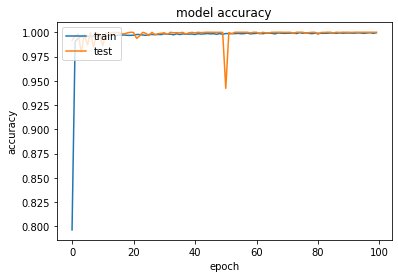

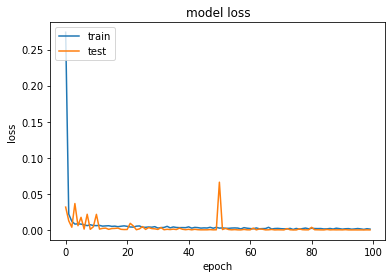

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred=cnn.predict(X_test) 


In [ ]:
print(y_test.shape)
print(y_pred.shape)

(24042, 4)
(24042, 4)


In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6034    0    0    0]
 [   0 5983    0    0]
 [   0    0 6010    0]
 [   0    0    0 6015]]


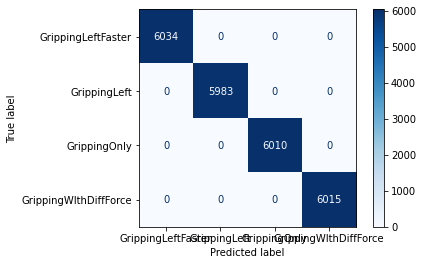

In [ ]:
#cm = confusion_matrix(y_test, y_pred)
labels = ["GrippingLeftFaster", "GrippingLeft", "GrippingOnly","GrippingWIthDiffForce"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Saving our model in SavedModel format

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model

# Save the model
filepath = './saved_model'
save_model(model, filepath)

Loading the model

In [ ]:
# Load the model
model = load_model(filepath, compile = True)

In [ ]:
from keras.models import model_from_json
import numpy as np

class FacialExpressionModel(object):

    EMOTIONS_LIST = ["DiffForceLeft", "GrippingLeft",
                     "GrippingOnly", "GrippingWithDiffForce"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model._make_predict_function()

    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]


*   get the image stream from our webcam
*   detect faces with OpenCV and add bounding boxes
*   convert the faces to greyscale, rescale them and send them to our pre-trained Neural Network
*   get the predictions back from our Neural Network and *   add the label to the webcam image
*   return the final image stream



In [ ]:
import cv2
from model import FacialExpressionModel
import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        _, jpeg = cv2.imencode('.jpg', fr)
        return jpeg.tobytes()

ModuleNotFoundError: ignored